In [16]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [17]:
email = pd.read_csv('messages.csv',encoding='latin-1')
email.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [18]:
print ('Shape = >',email.shape)

Shape = > (2893, 3)


In [19]:
print ('ham and spam counts','\n',email.label.value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [20]:
#Ratio
print ('spam ratio = ', round(len(email[email['label']=='0']) / len(email.label),3)*100,'%')
print ('ham ratio  = ', round(len(email[email['label']=='1']) / len(email.label),3)*100,'%')

spam ratio =  0.0 %
ham ratio  =  0.0 %


In [21]:
#New column for Length of message
email['length'] = email.message.str.len()
email.head(5)

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [22]:
email.subject.fillna("IGNORE TEXT")

0                 job posting - apple-iss research center
1                                             IGNORE TEXT
2       query : letter frequencies for text identifica...
3                                                    risk
4                                request book information
                              ...                        
2888                         love your profile - ysuolvpv
2889                   you have been asked to join kiddin
2890                   anglicization of composers ' names
2891    re : 6 . 797 , comparative method : n - ary co...
2892                 re : american - english in australia
Name: subject, Length: 2893, dtype: object

In [23]:
# Convert all messages to lower case
email['message'] = email['message'].str.lower()

In [24]:
# Convert all messages to lower case
email['subject'] = email['subject'].str.lower()

In [25]:

email.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [26]:
# Replace email addresses with 'email'
email['message'] = email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
email['message'] = email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
email['message'] = email['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['message'] = email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
email['message'] = email['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [27]:
# Remove punctuation
email['message'] = email['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email['message'] = email['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email['message'] = email['message'].str.replace(r'^\s+|\s+?$', '')

In [28]:
# Replace email addresses with 'email'
email['subject'] = email['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
email['subject'] = email['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
email['subject'] = email['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['subject'] = email['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
email['subject'] = email['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [29]:
# Remove punctuation
email['subject'] = email['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email['subject'] = email['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email['subject'] = email['subject'].str.replace(r'^\s+|\s+?$', '')

In [30]:
email.head()

subject  \
0             job posting apple iss research center   
1                                               NaN   
2  query letter frequencies for text identification   
3                                              risk   
4                          request book information   

                                             message  label  length  
0  content length numbr apple iss research center...      0    2856  
1  lang classification grimes joseph e and barbar...      0    1800  
2  i am posting this inquiry for sergei atamas sa...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [31]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

email['message'] = email['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [32]:
# New column (clean_length) after puncuations,stopwords removal
email['clean_length'] = email.message.str.len()
email.head()

subject  \
0             job posting apple iss research center   
1                                               NaN   
2  query letter frequencies for text identification   
3                                              risk   
4                          request book information   

                                             message  label  length  \
0  content length numbr apple iss research center...      0    2856   
1  lang classification grimes joseph e barbara f ...      0    1800   
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   
3  colleague researching differing degrees risk p...      0     324   
4  earlier morning phone friend mine living south...      0    1046   

   clean_length  
0          2179  
1          1454  
2          1064  
3           210  
4           629

In [33]:
# Total length removal
print ('Origian Length', email.length.sum())
print ('Clean Length', email.clean_length.sum())

Origian Length 9344743
Clean Length 6767857


In [34]:
data=email

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ct.pune\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
#Adding a column of numbers of charachters,words and sentences in each msg
data["No_of_Characters"] = data["message"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)

data.describe().T

count         mean          std   min    25%     50%  \
label             2893.0     0.166263     0.372381   0.0    0.0     0.0   
length            2893.0  3230.122019  3654.605695  17.0  954.0  2026.0   
clean_length      2893.0  2339.390598  2605.116102   0.0  668.0  1485.0   
No_of_Characters  2893.0  2339.390598  2605.116102   0.0  668.0  1485.0   
No_of_Words       2893.0   336.048738   404.006824   0.0   92.0   202.0   
No_of_sentence    2893.0     0.999654     0.018592   0.0    1.0     1.0   

                     75%      max  
label                0.0      1.0  
length            4039.0  28649.0  
clean_length      2973.0  18870.0  
No_of_Characters  2973.0  18870.0  
No_of_Words        409.0   4537.0  
No_of_sentence       1.0      1.0

In [37]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email[email['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(email[email['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()


In [38]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email[email['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(email[email['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

In [39]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = email['message'][email['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

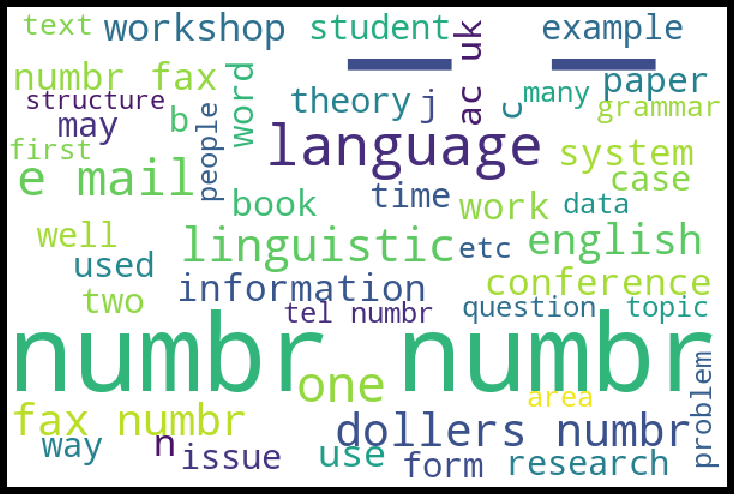

In [40]:
#Getting sense of loud words in ham 

hams = email['message'][email['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [41]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(email['message'])

X = features
y = email['label']

In [42]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [43]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



In [45]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [46]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, Y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [47]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.851542 
RandomForest: 0.971881 
KNeighbours: 0.969107 
SVC: 0.970959 


In [48]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(x_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,Y_train)
    test_accuracy = model.score(x_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)
# 

In [51]:
# initialise data of lists.
email = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(email, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [52]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

In [53]:
from sklearn.externals import joblib    # Saving Model
joblib.dump(SVC,'email.obj')

['email.obj']